In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unrar x "/content/drive/MyDrive/YOLO/dataset.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/YOLO/dataset.rar

Creating    dataset                                                   OK
Extracting  dataset/data.yaml                                              0%  OK 
Creating    dataset/test                                              OK
Creating    dataset/test/images                                       OK
Extracting  dataset/test/images/112_jpg.rf.0bd7b82bca4aaa849b8a2237adfd6181.jpg       0%  OK 
Extracting  dataset/test/images/1279_jpg.rf.ad5f0c4796abbe9a656f73f2378cff37.jpg       0%  OK 
Extracting  dataset/test/images/12_x_6_forza_alu110_socketed_soccer_goal_jpg.rf.3a62c661268a5f7c73553185a822d283.jpg       0%  OK 
Extracting  dataset/test/images/1444_jpg.rf.3e769a9c6fd96ae6e451e6f4a8a3ee46.jpg       0%  OK 
Extracting  dataset/test/images/1451_jpg.rf.4af0cd7c4dbec32bf73dae0dc9e8349c.jpg       0%  OK 
E

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# **Primer entrenamiento**

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

# Ruta a tu archivo de configuración data.yaml
data_yaml = r"/content/dataset/data.yaml"

save_dir = r"/content/drive/MyDrive/YOLO"

# Entrenar el modelo
model.train(
    data=data_yaml,
    epochs=35,
    imgsz=640,
    batch=32,        # Máximo posible sin OOM
    workers=2,       # Prueba valores entre 0-4
    optimizer="SGD", # Mejor para YOLO
    device="cuda",
    lr0=0.01,        # Tasa de aprendizaje inicial
    momentum=0.937,
    warmup_epochs=3,
    weight_decay=0.0005,
    project=save_dir
)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 99.7MB/s]


Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/dataset/data.yaml, epochs=35, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/YOLO, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 21.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 15615 images, 2 backgrounds, 0 corrupt: 100%|██████████| 15617/15617 [00:33<00:00, 460.44it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 546 images, 0 backgrounds, 0 corrupt: 100%|██████████| 546/546 [00:01<00:00, 523.17it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to /content/drive/MyDrive/YOLO/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO/train
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      4.74G       1.42      2.165      1.353          3        640: 100%|██████████| 489/489 [05:14<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.17it/s]

                   all        546        605      0.727      0.738       0.76       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      5.52G       1.36      1.382      1.273          1        640: 100%|██████████| 489/489 [05:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.39it/s]

                   all        546        605      0.805       0.64      0.732       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      5.52G      1.411      1.441      1.314          1        640: 100%|██████████| 489/489 [04:59<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.21it/s]

                   all        546        605      0.526      0.585      0.538      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      5.52G      1.471      1.514      1.369          2        640: 100%|██████████| 489/489 [05:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.35it/s]

                   all        546        605      0.767      0.549      0.687      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      5.52G      1.414      1.377      1.332          3        640: 100%|██████████| 489/489 [04:57<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]

                   all        546        605      0.786      0.698       0.78      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      5.52G      1.366       1.27      1.305          1        640: 100%|██████████| 489/489 [05:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]

                   all        546        605      0.836      0.789       0.85      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      5.52G      1.333      1.197      1.289          1        640: 100%|██████████| 489/489 [04:55<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]

                   all        546        605      0.825       0.79      0.866       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      5.52G      1.302      1.144      1.264          3        640: 100%|██████████| 489/489 [04:52<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]

                   all        546        605      0.831      0.818      0.866      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      5.52G      1.271      1.083      1.246          1        640: 100%|██████████| 489/489 [04:56<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]

                   all        546        605      0.887      0.813      0.891      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      5.52G      1.254      1.055      1.236          1        640: 100%|██████████| 489/489 [04:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        546        605      0.905      0.829      0.897      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      5.52G      1.224      1.004      1.215          4        640: 100%|██████████| 489/489 [04:50<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]

                   all        546        605      0.912      0.829      0.896      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      5.52G        1.2     0.9784      1.197          0        640: 100%|██████████| 489/489 [04:49<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        546        605       0.93      0.799      0.897      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      5.52G      1.189      0.945      1.195          3        640: 100%|██████████| 489/489 [04:48<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.36it/s]

                   all        546        605      0.852      0.851      0.902       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      5.52G      1.171      0.915      1.182          3        640: 100%|██████████| 489/489 [04:47<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]

                   all        546        605      0.902      0.827      0.906      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      5.52G      1.159     0.8917      1.176          1        640: 100%|██████████| 489/489 [04:47<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]

                   all        546        605      0.904      0.833      0.904      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      5.52G      1.144     0.8785      1.162          2        640: 100%|██████████| 489/489 [04:45<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]

                   all        546        605      0.904      0.834      0.909      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      5.52G      1.132     0.8448      1.156          2        640: 100%|██████████| 489/489 [04:44<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.33it/s]

                   all        546        605      0.891      0.881      0.914      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      5.52G      1.112     0.8294      1.147          1        640: 100%|██████████| 489/489 [04:45<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        546        605      0.923      0.859      0.919      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      5.52G      1.099     0.8005      1.137          1        640: 100%|██████████| 489/489 [04:48<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all        546        605       0.91      0.865      0.926      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      5.52G      1.092     0.7982       1.13          0        640: 100%|██████████| 489/489 [04:45<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]

                   all        546        605      0.923      0.867       0.92        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      5.52G      1.073     0.7639      1.117          4        640: 100%|██████████| 489/489 [04:48<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.33it/s]

                   all        546        605      0.929      0.834      0.929      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      5.52G      1.062     0.7462      1.107          3        640: 100%|██████████| 489/489 [04:55<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        546        605      0.916      0.889      0.924      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      5.52G      1.039     0.7286      1.105          1        640: 100%|██████████| 489/489 [04:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.33it/s]

                   all        546        605      0.895      0.868      0.913      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      5.52G      1.028     0.7137      1.094          1        640: 100%|██████████| 489/489 [04:53<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.56it/s]

                   all        546        605      0.942      0.875      0.925      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      5.52G      1.028     0.7008      1.093          2        640: 100%|██████████| 489/489 [04:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all        546        605      0.928      0.874      0.919      0.707


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      5.52G      1.016     0.6109      1.092          2        640: 100%|██████████| 489/489 [04:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]

                   all        546        605       0.92       0.87      0.925      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      5.52G     0.9898     0.5779      1.075          1        640: 100%|██████████| 489/489 [04:33<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all        546        605      0.942      0.887       0.93      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      5.52G      0.967     0.5586      1.062          2        640: 100%|██████████| 489/489 [04:33<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        546        605      0.924      0.891      0.935      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      5.52G     0.9538     0.5413      1.055          1        640: 100%|██████████| 489/489 [04:34<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]

                   all        546        605      0.937      0.896      0.933       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      5.52G     0.9354     0.5298      1.042          1        640: 100%|██████████| 489/489 [04:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all        546        605       0.94      0.887      0.928      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      5.52G     0.9168     0.5106       1.03          1        640: 100%|██████████| 489/489 [04:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]

                   all        546        605      0.926      0.892      0.927      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      5.52G     0.9018     0.4993      1.025          1        640: 100%|██████████| 489/489 [04:28<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]

                   all        546        605      0.938      0.903      0.932      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      5.52G     0.8829     0.4811      1.015          1        640: 100%|██████████| 489/489 [04:30<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]

                   all        546        605      0.935      0.901       0.93      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      5.52G     0.8624     0.4694      1.005          1        640: 100%|██████████| 489/489 [04:34<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]

                   all        546        605      0.924      0.896      0.929      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      5.52G     0.8564     0.4574      1.003          1        640: 100%|██████████| 489/489 [04:35<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.44it/s]

                   all        546        605      0.931      0.899      0.933      0.733



35 epochs completed in 2.864 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO/train/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/YOLO/train/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/YOLO/train/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.15s/it]


                   all        546        605      0.924      0.891      0.935      0.734
                  ball        464        522      0.933      0.807      0.883      0.644
             goal_post         82         83      0.914      0.976      0.987      0.824
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO/train
Modelo entrenado guardado en: runs/detect/train/weights/best.pt


# **Segundo entrenamiento**

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/YOLO/train/weights/last.pt")

# Ruta a tu archivo de configuración data.yaml
data_yaml = r"/content/dataset/data.yaml"

save_dir = r"/content/drive/MyDrive/YOLO"

# Entrenar el modelo
model.train(
    data=data_yaml,
    epochs=35,
    imgsz=640,
    batch=32,        # Máximo posible sin OOM
    workers=2,       # Prueba valores entre 0-4
    optimizer="SGD", # Mejor para YOLO
    device="cuda",
    lr0=0.01,        # Tasa de aprendizaje inicial
    momentum=0.937,
    warmup_epochs=3,
    weight_decay=0.0005,
    project=save_dir
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLO/train/weights/last.pt, data=/content/dataset/data.yaml, epochs=35, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/YOLO, name=train2, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, sa

100%|██████████| 755k/755k [00:00<00:00, 29.7MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 111MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 15615 images, 2 backgrounds, 0 corrupt: 100%|██████████| 15617/15617 [00:31<00:00, 492.92it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 546 images, 0 backgrounds, 0 corrupt: 100%|██████████| 546/546 [00:00<00:00, 547.27it/s]


val: New cache created: /content/dataset/valid/labels.cache
Plotting labels to /content/drive/MyDrive/YOLO/train2/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO/train2
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35       4.4G     0.9555     0.6271      1.055          3        640: 100%|██████████| 489/489 [04:43<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]

                   all        546        605      0.932      0.871      0.923      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      5.17G     0.9777     0.6518       1.06          1        640: 100%|██████████| 489/489 [04:33<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]

                   all        546        605      0.891      0.867      0.914      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      5.17G      1.035     0.7302      1.093          1        640: 100%|██████████| 489/489 [04:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]

                   all        546        605      0.893      0.853      0.891      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      5.17G      1.134     0.8555      1.146          2        640: 100%|██████████| 489/489 [04:34<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]

                   all        546        605      0.886      0.835      0.885      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      5.17G      1.141     0.8555       1.15          3        640: 100%|██████████| 489/489 [04:32<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]

                   all        546        605      0.864      0.746      0.833      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      5.17G       1.12     0.8336      1.142          1        640: 100%|██████████| 489/489 [04:27<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]

                   all        546        605      0.882      0.798      0.893      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      5.17G      1.121     0.8257      1.139          1        640: 100%|██████████| 489/489 [04:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]

                   all        546        605      0.908       0.87      0.909      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      5.17G      1.108     0.8102      1.128          3        640: 100%|██████████| 489/489 [04:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all        546        605      0.895      0.834      0.897      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      5.17G      1.086     0.7836      1.118          1        640: 100%|██████████| 489/489 [04:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        546        605      0.871      0.849      0.906      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      5.17G      1.078     0.7809      1.115          1        640: 100%|██████████| 489/489 [04:28<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]

                   all        546        605      0.911      0.842       0.91      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      5.17G      1.062     0.7519      1.106          4        640: 100%|██████████| 489/489 [04:26<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        546        605      0.913      0.842      0.911      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      5.17G      1.048     0.7348      1.097          0        640: 100%|██████████| 489/489 [04:28<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]

                   all        546        605      0.921      0.853      0.919      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      5.17G      1.042     0.7289      1.095          3        640: 100%|██████████| 489/489 [04:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        546        605      0.894      0.865      0.912      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      5.17G      1.031     0.7133      1.089          3        640: 100%|██████████| 489/489 [04:28<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        546        605      0.912      0.863      0.921      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      5.17G      1.026     0.6969      1.085          1        640: 100%|██████████| 489/489 [04:26<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]

                   all        546        605      0.867      0.874      0.908      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      5.17G      1.011     0.6969      1.079          2        640: 100%|██████████| 489/489 [04:32<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]

                   all        546        605      0.914      0.853      0.924      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      5.17G     0.9993     0.6712      1.075          2        640: 100%|██████████| 489/489 [04:34<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        546        605       0.94      0.868      0.924      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      5.17G     0.9927      0.666      1.074          1        640: 100%|██████████| 489/489 [04:33<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all        546        605      0.928      0.869      0.928      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      5.17G     0.9774     0.6543      1.061          1        640: 100%|██████████| 489/489 [04:27<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        546        605      0.905      0.895      0.923      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      5.17G     0.9666     0.6439      1.053          0        640: 100%|██████████| 489/489 [04:28<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]

                   all        546        605      0.921      0.897      0.937      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      5.17G     0.9525     0.6223      1.046          4        640: 100%|██████████| 489/489 [04:27<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]

                   all        546        605      0.957      0.875      0.932       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      5.17G     0.9502     0.6165      1.041          3        640: 100%|██████████| 489/489 [04:28<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all        546        605       0.93      0.878      0.928      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      5.17G     0.9274     0.6025      1.034          1        640: 100%|██████████| 489/489 [04:25<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]

                   all        546        605      0.921      0.896      0.928      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      5.17G      0.919     0.5925       1.03          1        640: 100%|██████████| 489/489 [04:28<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        546        605       0.92      0.903      0.931      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      5.17G     0.9182     0.5879       1.03          2        640: 100%|██████████| 489/489 [04:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        546        605      0.936      0.894      0.932      0.731


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      5.17G     0.9022     0.4966      1.022          2        640: 100%|██████████| 489/489 [04:19<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]

                   all        546        605      0.937      0.885      0.931      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      5.17G     0.8768      0.473      1.006          1        640: 100%|██████████| 489/489 [04:15<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]

                   all        546        605      0.926      0.894      0.931      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      5.17G     0.8579     0.4629      1.002          2        640: 100%|██████████| 489/489 [04:18<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.36it/s]

                   all        546        605      0.942      0.888      0.932       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      5.17G     0.8481     0.4545     0.9939          1        640: 100%|██████████| 489/489 [04:17<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]

                   all        546        605      0.954      0.896      0.933      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      5.17G     0.8273     0.4408     0.9844          1        640: 100%|██████████| 489/489 [04:15<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]

                   all        546        605      0.951      0.878      0.932      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      5.17G     0.8146      0.428     0.9748          1        640: 100%|██████████| 489/489 [04:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]

                   all        546        605      0.936      0.897      0.933      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      5.17G        0.8     0.4201      0.972          1        640: 100%|██████████| 489/489 [04:17<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]

                   all        546        605      0.933      0.894      0.932      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      5.17G     0.7852     0.4089     0.9628          1        640: 100%|██████████| 489/489 [04:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]

                   all        546        605      0.947       0.89      0.933      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      5.17G     0.7656     0.3989     0.9548          1        640: 100%|██████████| 489/489 [04:17<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        546        605      0.948      0.887      0.935      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      5.17G     0.7616     0.3924     0.9539          1        640: 100%|██████████| 489/489 [04:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.57it/s]

                   all        546        605      0.937      0.898      0.934      0.736



35 epochs completed in 2.647 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO/train2/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/YOLO/train2/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/YOLO/train2/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.21it/s]


                   all        546        605      0.937      0.898      0.934      0.735
                  ball        464        522      0.929      0.831      0.892      0.655
             goal_post         82         83      0.946      0.964      0.977      0.815
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7883231fc790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# **Tercer entrenamiento**

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/YOLO/train2/weights/last.pt")

# Ruta a tu archivo de configuración data.yaml
data_yaml = r"/content/dataset/data.yaml"

save_dir = r"/content/drive/MyDrive/YOLO"

# Entrenar el modelo
model.train(
    data=data_yaml,
    epochs=35,
    imgsz=640,
    batch=32,        # Máximo posible sin OOM
    workers=2,       # Prueba valores entre 0-4
    optimizer="SGD", # Mejor para YOLO
    device="cuda",
    lr0=0.01,        # Tasa de aprendizaje inicial
    momentum=0.937,
    warmup_epochs=3,
    weight_decay=0.0005,
    project=save_dir
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLO/train2/weights/last.pt, data=/content/dataset/data.yaml, epochs=35, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/YOLO, name=train3, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, s

100%|██████████| 755k/755k [00:00<00:00, 154MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 243MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 15615 images, 2 backgrounds, 0 corrupt: 100%|██████████| 15617/15617 [00:26<00:00, 579.38it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 546 images, 0 backgrounds, 0 corrupt: 100%|██████████| 546/546 [00:00<00:00, 629.64it/s]


val: New cache created: /content/dataset/valid/labels.cache
Plotting labels to /content/drive/MyDrive/YOLO/train3/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO/train3
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35       4.4G     0.8591     0.5396      1.004          3        640: 100%|██████████| 489/489 [05:11<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.23it/s]

                   all        546        605      0.949      0.888      0.936       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      5.18G     0.8774     0.5556      1.009          1        640: 100%|██████████| 489/489 [05:02<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        546        605       0.93      0.872      0.922      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      5.18G      0.931     0.6135      1.036          1        640: 100%|██████████| 489/489 [05:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all        546        605      0.895      0.828      0.893      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      5.18G      1.035     0.7224      1.083          2        640: 100%|██████████| 489/489 [05:06<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]

                   all        546        605      0.843      0.788      0.876      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      5.18G      1.042     0.7285      1.089          3        640: 100%|██████████| 489/489 [05:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        546        605      0.784      0.823      0.858      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      5.18G      1.025      0.715      1.084          1        640: 100%|██████████| 489/489 [05:02<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        546        605      0.889      0.826      0.887      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      5.18G      1.029     0.7126      1.087          1        640: 100%|██████████| 489/489 [04:50<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.42it/s]

                   all        546        605      0.914      0.786      0.893      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      5.18G      1.019     0.7057      1.076          3        640: 100%|██████████| 489/489 [04:47<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        546        605      0.892      0.847      0.907      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      5.18G     0.9992     0.6811      1.067          1        640: 100%|██████████| 489/489 [04:44<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        546        605      0.913      0.871      0.917      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      5.18G     0.9927     0.6904      1.066          1        640: 100%|██████████| 489/489 [04:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]

                   all        546        605      0.927      0.812      0.913      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      5.18G     0.9888     0.6646      1.063          4        640: 100%|██████████| 489/489 [04:28<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]

                   all        546        605      0.898      0.855       0.91      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      5.18G     0.9749     0.6575      1.056          0        640: 100%|██████████| 489/489 [04:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all        546        605      0.902      0.867      0.914      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      5.18G     0.9686     0.6489      1.054          3        640: 100%|██████████| 489/489 [04:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]

                   all        546        605      0.915      0.869      0.915      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      5.18G     0.9576     0.6349      1.048          3        640: 100%|██████████| 489/489 [04:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]

                   all        546        605      0.899      0.905      0.924      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      5.18G     0.9531     0.6247      1.044          1        640: 100%|██████████| 489/489 [04:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]

                   all        546        605      0.862      0.862      0.917      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      5.18G     0.9413     0.6227      1.037          2        640: 100%|██████████| 489/489 [04:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        546        605      0.913      0.871      0.927      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      5.18G     0.9296     0.6003      1.034          2        640: 100%|██████████| 489/489 [04:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]

                   all        546        605      0.888      0.896      0.915      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      5.18G     0.9225     0.5999      1.032          1        640: 100%|██████████| 489/489 [04:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        546        605      0.941       0.88      0.918      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      5.18G     0.9082     0.5855      1.023          1        640: 100%|██████████| 489/489 [04:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]

                   all        546        605      0.916      0.894      0.925      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      5.18G     0.9032     0.5827      1.019          0        640: 100%|██████████| 489/489 [04:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]

                   all        546        605      0.926      0.884       0.93       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      5.18G     0.8827     0.5612       1.01          4        640: 100%|██████████| 489/489 [04:27<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]

                   all        546        605      0.962      0.865      0.933       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      5.18G     0.8815     0.5556      1.007          3        640: 100%|██████████| 489/489 [04:24<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.43it/s]

                   all        546        605      0.921      0.889      0.919      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      5.18G      0.861     0.5431      1.001          1        640: 100%|██████████| 489/489 [04:26<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all        546        605      0.928      0.886      0.927       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      5.18G      0.852     0.5357     0.9952          1        640: 100%|██████████| 489/489 [04:37<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]

                   all        546        605      0.911      0.894       0.92      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      5.18G     0.8501     0.5321     0.9978          2        640: 100%|██████████| 489/489 [04:36<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.41it/s]

                   all        546        605      0.935      0.878      0.925       0.73


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      5.18G     0.8283     0.4456     0.9825          2        640: 100%|██████████| 489/489 [04:59<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]

                   all        546        605      0.939      0.886      0.925      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      5.18G     0.8064     0.4266     0.9697          1        640: 100%|██████████| 489/489 [04:58<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        546        605      0.921      0.886      0.928      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      5.18G     0.7875     0.4163      0.965          2        640: 100%|██████████| 489/489 [05:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]

                   all        546        605       0.95      0.877      0.925      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      5.18G     0.7781     0.4104     0.9618          1        640: 100%|██████████| 489/489 [05:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.56it/s]

                   all        546        605      0.945      0.889      0.929      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      5.18G     0.7625     0.4013      0.954          1        640: 100%|██████████| 489/489 [05:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        546        605      0.914      0.903       0.93      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      5.18G     0.7472     0.3907     0.9452          1        640: 100%|██████████| 489/489 [04:58<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]

                   all        546        605      0.928       0.89      0.929      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      5.18G     0.7322     0.3814     0.9412          1        640: 100%|██████████| 489/489 [05:02<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.29it/s]

                   all        546        605      0.931      0.899       0.93      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      5.18G     0.7201     0.3738     0.9344          1        640: 100%|██████████| 489/489 [04:48<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]

                   all        546        605      0.918      0.909       0.93      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      5.18G     0.7053     0.3646     0.9288          1        640: 100%|██████████| 489/489 [04:55<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        546        605       0.92      0.907      0.931      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      5.18G     0.6991     0.3584     0.9273          1        640: 100%|██████████| 489/489 [04:35<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.43it/s]

                   all        546        605      0.914      0.916      0.931      0.738



35 epochs completed in 2.834 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO/train3/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/YOLO/train3/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/YOLO/train3/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


                   all        546        605      0.914      0.916      0.931      0.738
                  ball        464        522      0.887      0.845      0.882      0.653
             goal_post         82         83      0.942      0.988       0.98      0.823
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x77fe06bd7cd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# **Fine-tuning**

417 imagenes

# **Cuarto Entrenamiento**

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/YOLO/train3/weights/best.pt")

# Ruta a tu archivo de configuración data.yaml
data_yaml = r"/content/dataset/data.yaml"

save_dir = r"/content/drive/MyDrive/YOLO"


# Congelar la capa backbone
for param in model.model.model[:10].parameters():
    param.requires_grad=False

# Se actualizarán sólo los parámetros de las capas que no estén congeladas.
model.train(
    data=data_yaml,
    epochs=50, #50, sino a 20, a 10
    imgsz=640,
    batch=8,        # Máximo posible sin OOM, podemos aumentar o disminuir batch
    workers=2,       # Prueba valores entre 0-4
    optimizer="SGD", # Mejor para YOLO
    device="cuda",
    lr0=0.0001,        # Tasa de aprendizaje inicial 0.0001
    momentum=0.937,
    warmup_epochs=3,
    weight_decay=0.0005,
    project=save_dir
)

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLO/train3/weights/best.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/YOLO, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

train: Scanning /content/dataset/train/labels.cache... 687 images, 0 backgrounds, 0 corrupt: 100%|██████████| 687/687 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/YOLO/train/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.31G     0.9108      1.205      1.024         10        640: 100%|██████████| 86/86 [00:19<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         26         52      0.936      0.942      0.899      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.57G     0.7796     0.6674       0.98         29        640: 100%|██████████| 86/86 [00:19<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         26         52      0.936      0.942      0.896      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.57G     0.7411     0.6318     0.9672         19        640: 100%|██████████| 86/86 [00:19<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         26         52      0.935      0.942      0.895      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.57G     0.7378       0.61     0.9676         15        640: 100%|██████████| 86/86 [00:17<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         26         52      0.934      0.942      0.895       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.57G     0.7311     0.5745     0.9543         22        640: 100%|██████████| 86/86 [00:17<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         26         52      0.934      0.942      0.895      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.57G     0.7229     0.5746     0.9583         25        640: 100%|██████████| 86/86 [00:18<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         26         52      0.933      0.942      0.895      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.57G     0.7234     0.5346     0.9616         15        640: 100%|██████████| 86/86 [00:17<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         26         52      0.933      0.942      0.895      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.57G      0.721     0.5373     0.9722         19        640: 100%|██████████| 86/86 [00:17<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         26         52      0.932      0.942      0.895      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.57G     0.7117      0.535     0.9543         28        640: 100%|██████████| 86/86 [00:18<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         26         52      0.933      0.942      0.895      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.57G     0.7255      0.582     0.9662         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         26         52      0.932      0.942      0.895      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.57G     0.7182      0.537     0.9496         30        640: 100%|██████████| 86/86 [00:17<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         26         52      0.932      0.942      0.895      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.57G     0.6958     0.5137     0.9534         18        640: 100%|██████████| 86/86 [00:17<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         26         52      0.932      0.942      0.895      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.57G     0.7022      0.511     0.9488         14        640: 100%|██████████| 86/86 [00:20<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         26         52      0.933      0.942      0.895      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.57G     0.6947     0.5131     0.9404         17        640: 100%|██████████| 86/86 [00:17<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         26         52      0.931      0.942      0.895      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.57G     0.6846     0.4892     0.9368         16        640: 100%|██████████| 86/86 [00:17<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         26         52      0.932      0.942      0.895      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.57G     0.6879     0.4995     0.9457         29        640: 100%|██████████| 86/86 [00:18<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         26         52      0.932      0.942      0.895      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.57G      0.673     0.4852     0.9401         21        640: 100%|██████████| 86/86 [00:17<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         26         52      0.933      0.942      0.895      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.57G     0.6971     0.5042     0.9453         19        640: 100%|██████████| 86/86 [00:17<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         26         52      0.932      0.942      0.895      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.57G     0.6757     0.4795     0.9514         17        640: 100%|██████████| 86/86 [00:17<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         26         52      0.932      0.942      0.895      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.57G      0.655     0.4865     0.9355         27        640: 100%|██████████| 86/86 [00:18<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         26         52      0.933      0.942      0.895      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.57G     0.6934     0.5037     0.9686         12        640: 100%|██████████| 86/86 [00:17<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         26         52      0.932      0.942      0.895      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.57G     0.6919     0.4962     0.9525         15        640: 100%|██████████| 86/86 [00:17<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         26         52      0.932      0.942      0.896      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.57G     0.6863     0.4725     0.9438         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         26         52      0.932      0.942      0.896      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.57G     0.6563     0.4739     0.9345         25        640: 100%|██████████| 86/86 [00:17<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         26         52      0.932      0.942      0.896      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.57G     0.6685     0.4827     0.9363         28        640: 100%|██████████| 86/86 [00:17<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         26         52      0.932      0.942      0.896      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.57G     0.6855     0.4924     0.9348         18        640: 100%|██████████| 86/86 [00:17<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         26         52      0.932      0.942      0.896      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.57G     0.6672     0.4642     0.9382         19        640: 100%|██████████| 86/86 [00:20<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         26         52      0.932      0.942      0.896      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.57G     0.6636     0.4802     0.9318         23        640: 100%|██████████| 86/86 [00:17<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         26         52      0.932      0.942      0.896      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.57G     0.6577     0.4849     0.9309         23        640: 100%|██████████| 86/86 [00:17<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         26         52      0.932      0.942      0.896      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.57G     0.6517     0.4669     0.9308         16        640: 100%|██████████| 86/86 [00:18<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         26         52      0.932      0.942      0.896      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.57G     0.6789     0.4706     0.9554         18        640: 100%|██████████| 86/86 [00:17<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         26         52      0.932      0.942      0.896       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.57G     0.6648     0.4729     0.9354         19        640: 100%|██████████| 86/86 [00:17<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         26         52      0.932      0.942      0.896      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.57G     0.6738     0.4728     0.9441         17        640: 100%|██████████| 86/86 [00:19<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         26         52      0.932      0.942      0.896      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.57G     0.6473     0.4705     0.9232         13        640: 100%|██████████| 86/86 [00:17<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         26         52      0.932      0.942      0.896      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.57G     0.6575     0.4665     0.9277         20        640: 100%|██████████| 86/86 [00:17<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         26         52      0.932      0.942      0.896       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.57G     0.6528      0.447     0.9255         27        640: 100%|██████████| 86/86 [00:17<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         26         52      0.932      0.942      0.896      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.57G     0.6777     0.4639     0.9438         18        640: 100%|██████████| 86/86 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         26         52      0.932      0.942      0.896      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.57G     0.6727     0.4725      0.935         25        640: 100%|██████████| 86/86 [00:17<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         26         52      0.932      0.942      0.896      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.57G     0.6555     0.4552      0.941         27        640: 100%|██████████| 86/86 [00:17<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         26         52      0.932      0.942      0.896      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.57G     0.6693     0.4702     0.9346         22        640: 100%|██████████| 86/86 [00:18<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         26         52      0.932      0.942      0.896      0.556


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.57G     0.6263     0.3943     0.8825         10        640: 100%|██████████| 86/86 [00:19<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         26         52      0.931      0.942      0.895      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.57G     0.6325     0.3993     0.8882         13        640: 100%|██████████| 86/86 [00:16<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         26         52      0.931      0.942      0.897      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.57G     0.6199        0.4     0.8671         12        640: 100%|██████████| 86/86 [00:18<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         26         52      0.931      0.942        0.9      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.57G     0.6214     0.3885     0.8771         12        640: 100%|██████████| 86/86 [00:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         26         52      0.931      0.942      0.898      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.57G     0.6108     0.3823     0.8661         13        640: 100%|██████████| 86/86 [00:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         26         52      0.931      0.942        0.9      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.57G     0.6156     0.3736     0.8883         13        640: 100%|██████████| 86/86 [00:17<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         26         52      0.932      0.942      0.898      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.57G     0.6162     0.3818      0.886         11        640: 100%|██████████| 86/86 [00:18<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         26         52      0.931      0.942        0.9      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.57G     0.6079     0.3735     0.8737         12        640: 100%|██████████| 86/86 [00:16<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         26         52      0.932      0.942        0.9      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.57G     0.6126     0.3798     0.8742         13        640: 100%|██████████| 86/86 [00:16<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         26         52      0.932      0.942        0.9      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.57G     0.6182     0.3925     0.8864         11        640: 100%|██████████| 86/86 [00:17<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         26         52      0.932      0.942        0.9      0.574



50 epochs completed in 0.261 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO/train/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/YOLO/train/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/YOLO/train/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]


                   all         26         52      0.932      0.942      0.898      0.572
                  ball         26         26      0.877      0.885        0.8      0.282
             goal_post         26         26      0.986          1      0.995      0.862
Speed: 0.4ms preprocess, 3.7ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78276a636ed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# **Quinto entrenamiento**

In [ ]:
model.train(
    data=data_yaml,
    epochs=20, #50, sino a 20, a 10
    imgsz=640,
    batch=8,        # Máximo posible sin OOM, podemos aumentar o disminuir batch
    workers=2,       # Prueba valores entre 0-4
    optimizer="SGD", # Mejor para YOLO
    device="cuda",
    lr0=0.0001,        # Tasa de aprendizaje inicial 0.0001
    momentum=0.937,
    warmup_epochs=3,
    weight_decay=0.0005,
    project=save_dir
)

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLO/train3/weights/best.pt, data=/content/dataset/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/YOLO, name=train6, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

train: Scanning /content/dataset/train/labels.cache... 687 images, 0 backgrounds, 0 corrupt: 100%|██████████| 687/687 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/YOLO/train6/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO/train6
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.28G     0.6676     0.4513     0.9323         10        640: 100%|██████████| 86/86 [00:18<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         26         52      0.933      0.942      0.896      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.47G     0.6566     0.4635     0.9352         29        640: 100%|██████████| 86/86 [00:17<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         26         52      0.933      0.942      0.897      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.47G     0.6371      0.457     0.9273         19        640: 100%|██████████| 86/86 [00:18<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]


                   all         26         52      0.933      0.942      0.896      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.47G     0.6361     0.4593     0.9291         15        640: 100%|██████████| 86/86 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         26         52      0.933      0.942      0.896      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.47G      0.634     0.4437     0.9217         22        640: 100%|██████████| 86/86 [00:17<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         26         52      0.932      0.942      0.896      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.47G     0.6352     0.4432     0.9279         25        640: 100%|██████████| 86/86 [00:18<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         26         52      0.932      0.942      0.896      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.47G      0.641     0.4312     0.9327         15        640: 100%|██████████| 86/86 [00:18<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         26         52      0.932      0.942      0.896      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.47G     0.6373      0.429     0.9423         19        640: 100%|██████████| 86/86 [00:17<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         26         52      0.932      0.942      0.896      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.47G       0.63     0.4403     0.9245         28        640: 100%|██████████| 86/86 [00:17<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         26         52      0.933      0.942      0.897      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.47G     0.6524     0.4798     0.9424         17        640: 100%|██████████| 86/86 [00:19<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         26         52      0.932      0.942      0.896      0.552


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.47G     0.6097     0.3763     0.8708         12        640: 100%|██████████| 86/86 [00:17<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         26         52      0.933      0.942      0.896      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.47G     0.6149      0.375     0.8916         14        640: 100%|██████████| 86/86 [00:16<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         26         52      0.933      0.942        0.9      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.47G     0.6026     0.3698     0.8827         12        640: 100%|██████████| 86/86 [00:20<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         26         52      0.933      0.942      0.903      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.47G     0.6002      0.372     0.8774         13        640: 100%|██████████| 86/86 [00:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all         26         52      0.933      0.942      0.903      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.47G     0.6024     0.3812     0.8712         12        640: 100%|██████████| 86/86 [00:16<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all         26         52      0.933      0.942      0.901      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.47G     0.6005     0.3686     0.8783         13        640: 100%|██████████| 86/86 [00:17<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         26         52      0.933      0.942      0.904      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.47G     0.6039     0.3639     0.8768         13        640: 100%|██████████| 86/86 [00:18<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         26         52      0.933      0.942      0.904      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.47G     0.5882     0.3615     0.8716         11        640: 100%|██████████| 86/86 [00:17<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         26         52      0.933      0.942      0.904      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.47G     0.5994     0.3701     0.8741         13        640: 100%|██████████| 86/86 [00:16<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         26         52      0.933      0.942      0.904      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.47G     0.6063     0.3571     0.8722         12        640: 100%|██████████| 86/86 [00:17<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         26         52      0.933      0.942      0.903      0.568



20 epochs completed in 0.104 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO/train6/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/YOLO/train6/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/YOLO/train6/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


                   all         26         52      0.933      0.942      0.901      0.573
                  ball         26         26      0.881      0.885      0.807      0.274
             goal_post         26         26      0.985          1      0.995      0.872
Speed: 0.3ms preprocess, 5.9ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78274cf27610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# **Sexto Entrenamiento**

In [ ]:
model.train(
    data=data_yaml,
    epochs=10, #50, sino a 20, a 10
    imgsz=640,
    batch=8,        # Máximo posible sin OOM, podemos aumentar o disminuir batch
    workers=2,       # Prueba valores entre 0-4
    optimizer="SGD", # Mejor para YOLO
    device="cuda",
    lr0=0.0001,        # Tasa de aprendizaje inicial 0.0001
    momentum=0.937,
    warmup_epochs=3,
    weight_decay=0.0005,
    project=save_dir
)

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLO/train3/weights/best.pt, data=/content/dataset/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/YOLO, name=train62, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

train: Scanning /content/dataset/train/labels.cache... 687 images, 0 backgrounds, 0 corrupt: 100%|██████████| 687/687 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/YOLO/train62/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO/train62
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.23G     0.5916     0.3592      0.864         13        640: 100%|██████████| 86/86 [00:18<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         26         52      0.932      0.942        0.9      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.43G     0.6073     0.3612     0.8795         11        640: 100%|██████████| 86/86 [00:18<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         26         52      0.933      0.942      0.902      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.43G     0.6004     0.3494     0.8696         14        640: 100%|██████████| 86/86 [00:17<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         26         52      0.933      0.942      0.903      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.43G      0.606     0.3608     0.8788         12        640: 100%|██████████| 86/86 [00:16<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         26         52      0.933      0.942      0.903      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.43G     0.5994     0.3634     0.8684         13        640: 100%|██████████| 86/86 [00:16<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         26         52      0.933      0.942      0.903      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.43G     0.5991     0.3551     0.8808         11        640: 100%|██████████| 86/86 [00:17<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         26         52      0.933      0.942      0.903      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.43G     0.5874     0.3537     0.8641         14        640: 100%|██████████| 86/86 [00:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         26         52      0.933      0.942      0.903      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.43G     0.5876      0.351     0.8706         13        640: 100%|██████████| 86/86 [00:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         26         52      0.933      0.942      0.903      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.43G     0.5878     0.3564     0.8756         12        640: 100%|██████████| 86/86 [00:16<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         26         52      0.933      0.942      0.903      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.43G     0.5815     0.3453     0.8671         12        640: 100%|██████████| 86/86 [00:17<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         26         52      0.933      0.942      0.903      0.561



10 epochs completed in 0.052 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO/train62/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/YOLO/train62/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/YOLO/train62/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]


                   all         26         52      0.933      0.942      0.902      0.568
                  ball         26         26      0.881      0.885      0.809      0.264
             goal_post         26         26      0.984          1      0.995      0.871
Speed: 0.2ms preprocess, 5.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO/train62


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78274c55fdd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# **Fine-Tuning**

1024 imagenes

# **Cuarto entrenamiento**

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/YOLO/train3/weights/best.pt")

data_yaml = r"/content/dataset/data.yaml"

save_dir = r"/content/drive/MyDrive/YOLO"


# Congelar la capa backbone
for param in model.model.model[:10].parameters():
    param.requires_grad=False

# Se actualizarán sólo los parámetros de las capas que no estén congeladas.
model.train(
    data=data_yaml,
    epochs=50, #50, sino a 20, a 10
    imgsz=640,
    batch=8,        # Máximo posible sin OOM, podemos aumentar o disminuir batch
    workers=2,       # Prueba valores entre 0-4
    optimizer="SGD", # Mejor para YOLO
    device="cuda",
    lr0=0.0001,        # Tasa de aprendizaje inicial 0.0001
    momentum=0.937,
    warmup_epochs=3,
    weight_decay=0.0005,
    project=save_dir
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLO/train3/weights/best.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/YOLO, name=train4, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, s

100%|██████████| 755k/755k [00:00<00:00, 23.7MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.6MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 1024 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1024/1024 [00:01<00:00, 544.16it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 563 images, 0 backgrounds, 0 corrupt: 100%|██████████| 563/563 [00:00<00:00, 642.42it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to /content/drive/MyDrive/YOLO/train4/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.24G     0.8915      1.078     0.9961         25        640: 100%|██████████| 128/128 [00:28<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:07<00:00,  4.63it/s]

                   all        563        676      0.941      0.817      0.894      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.51G     0.8157     0.6382     0.9571         18        640: 100%|██████████| 128/128 [00:24<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.64it/s]

                   all        563        676      0.932      0.822      0.898      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.53G     0.7838      0.582       0.95         15        640: 100%|██████████| 128/128 [00:24<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.16it/s]

                   all        563        676      0.927      0.818        0.9      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.53G     0.7586     0.5811     0.9408         16        640: 100%|██████████| 128/128 [00:26<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.52it/s]

                   all        563        676      0.915      0.826      0.904       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.54G      0.775     0.5443     0.9472         13        640: 100%|██████████| 128/128 [00:25<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.62it/s]

                   all        563        676      0.908      0.821      0.905      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.55G     0.7673     0.5583     0.9543         21        640: 100%|██████████| 128/128 [00:25<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.61it/s]

                   all        563        676       0.89      0.838      0.905      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.56G     0.7511      0.528     0.9404         19        640: 100%|██████████| 128/128 [00:25<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.57it/s]

                   all        563        676       0.92      0.821      0.907      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.57G     0.7491     0.5528     0.9406         15        640: 100%|██████████| 128/128 [00:24<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.51it/s]

                   all        563        676      0.899      0.828      0.906      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.58G     0.7508     0.5169     0.9432         24        640: 100%|██████████| 128/128 [00:24<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.05it/s]

                   all        563        676       0.93      0.815      0.907      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.59G     0.7386     0.5096     0.9344         24        640: 100%|██████████| 128/128 [00:26<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.64it/s]

                   all        563        676      0.887      0.837      0.908      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       1.6G     0.7311      0.499     0.9363         13        640: 100%|██████████| 128/128 [00:25<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.61it/s]

                   all        563        676      0.883      0.837      0.908      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.61G     0.7219     0.4872     0.9277         23        640: 100%|██████████| 128/128 [00:25<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.49it/s]

                   all        563        676      0.903      0.828      0.907      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.62G     0.7156     0.4846     0.9315         22        640: 100%|██████████| 128/128 [00:24<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.88it/s]

                   all        563        676      0.919      0.822      0.909       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.63G     0.7201     0.5052     0.9231         11        640: 100%|██████████| 128/128 [00:23<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.60it/s]

                   all        563        676      0.913       0.83      0.907       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.64G      0.715     0.4976     0.9318         12        640: 100%|██████████| 128/128 [00:23<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:07<00:00,  4.60it/s]

                   all        563        676       0.93      0.823      0.908       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.65G     0.7243     0.4914      0.921          8        640: 100%|██████████| 128/128 [00:26<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.45it/s]

                   all        563        676      0.907      0.835      0.909      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.66G     0.6956      0.471     0.9132         17        640: 100%|██████████| 128/128 [00:25<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.50it/s]

                   all        563        676      0.925      0.822      0.909      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.67G     0.7047     0.4752     0.9244         21        640: 100%|██████████| 128/128 [00:25<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.38it/s]

                   all        563        676      0.909      0.839      0.909       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.68G     0.7174     0.4903     0.9327         22        640: 100%|██████████| 128/128 [00:25<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  7.06it/s]

                   all        563        676      0.917      0.837       0.91      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.69G     0.6937     0.4835     0.9178         19        640: 100%|██████████| 128/128 [00:24<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.49it/s]

                   all        563        676      0.913      0.845      0.911      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       1.7G     0.7229     0.4673     0.9344         27        640: 100%|██████████| 128/128 [00:25<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.05it/s]

                   all        563        676      0.912       0.84      0.911      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.71G     0.7224     0.4963     0.9287         21        640: 100%|██████████| 128/128 [00:24<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  7.13it/s]

                   all        563        676      0.921      0.838      0.911      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.72G     0.6817     0.4688      0.917         21        640: 100%|██████████| 128/128 [00:25<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.77it/s]

                   all        563        676      0.915       0.85      0.911      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.73G     0.6899     0.4552     0.9131         29        640: 100%|██████████| 128/128 [00:25<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.65it/s]

                   all        563        676      0.913      0.843      0.911      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.74G     0.7038      0.466     0.9193         15        640: 100%|██████████| 128/128 [00:24<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.68it/s]

                   all        563        676       0.92      0.841      0.912      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.75G     0.7062     0.4706     0.9311         20        640: 100%|██████████| 128/128 [00:24<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.92it/s]

                   all        563        676       0.91      0.846      0.913      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.76G     0.7035     0.4556     0.9207         24        640: 100%|██████████| 128/128 [00:26<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.66it/s]

                   all        563        676      0.905       0.85      0.913      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.77G     0.6873      0.461     0.9209         21        640: 100%|██████████| 128/128 [00:24<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.26it/s]

                   all        563        676      0.913      0.847      0.914      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.78G     0.6882     0.4624     0.9152         24        640: 100%|██████████| 128/128 [00:25<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.64it/s]

                   all        563        676      0.915      0.847      0.913      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.79G     0.6765      0.452     0.9146         28        640: 100%|██████████| 128/128 [00:25<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.30it/s]

                   all        563        676      0.913       0.85      0.913      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       1.8G     0.6855     0.4705     0.9134         20        640: 100%|██████████| 128/128 [00:25<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.46it/s]

                   all        563        676      0.933      0.847      0.914      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.81G     0.6963     0.4588     0.9216         16        640: 100%|██████████| 128/128 [00:25<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:07<00:00,  4.57it/s]

                   all        563        676      0.922      0.848      0.913      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.82G     0.6912     0.4533     0.9266         22        640: 100%|██████████| 128/128 [00:23<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.57it/s]

                   all        563        676      0.906       0.85      0.913      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.83G     0.6977     0.4541     0.9243         15        640: 100%|██████████| 128/128 [00:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.68it/s]

                   all        563        676      0.909      0.845      0.913      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.84G     0.6955      0.463     0.9192         15        640: 100%|██████████| 128/128 [00:25<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.81it/s]

                   all        563        676      0.913      0.848      0.914      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.85G     0.6731     0.4515     0.9093         14        640: 100%|██████████| 128/128 [00:25<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.49it/s]

                   all        563        676      0.902      0.852      0.914      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.86G     0.6851     0.4531     0.9137         22        640: 100%|██████████| 128/128 [00:25<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.60it/s]

                   all        563        676      0.905      0.848      0.915      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.87G     0.6943     0.4625     0.9241         31        640: 100%|██████████| 128/128 [00:26<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.62it/s]

                   all        563        676      0.917      0.845      0.914      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.88G     0.6895     0.4626     0.9187         18        640: 100%|██████████| 128/128 [00:23<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.71it/s]

                   all        563        676      0.916      0.849      0.915      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.89G     0.6757     0.4453     0.9205         31        640: 100%|██████████| 128/128 [00:24<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.26it/s]

                   all        563        676      0.902      0.846      0.913      0.693


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       1.9G     0.6926     0.4001     0.8815         16        640: 100%|██████████| 128/128 [00:25<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.58it/s]

                   all        563        676       0.87      0.858      0.913      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.91G     0.6923     0.4046     0.8818         14        640: 100%|██████████| 128/128 [00:24<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.67it/s]

                   all        563        676      0.876      0.867      0.914       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.92G     0.6759     0.3983      0.874         16        640: 100%|██████████| 128/128 [00:24<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.60it/s]

                   all        563        676       0.88      0.861      0.914      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.93G      0.673      0.401     0.8843         15        640: 100%|██████████| 128/128 [00:26<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.53it/s]

                   all        563        676      0.886      0.864      0.915      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.94G     0.6859     0.4009     0.8847         15        640: 100%|██████████| 128/128 [00:24<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.65it/s]

                   all        563        676      0.874      0.863      0.913      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.95G     0.6932     0.3935     0.8836         14        640: 100%|██████████| 128/128 [00:23<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.96it/s]

                   all        563        676      0.882      0.864      0.914      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.96G     0.6836     0.3929     0.8774         14        640: 100%|██████████| 128/128 [00:22<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.75it/s]

                   all        563        676      0.876      0.874      0.914      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.97G     0.6663     0.3922     0.8728         13        640: 100%|██████████| 128/128 [00:22<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.61it/s]

                   all        563        676      0.883      0.864      0.914      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.98G     0.6852      0.397     0.8775         14        640: 100%|██████████| 128/128 [00:22<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.69it/s]

                   all        563        676      0.884      0.864      0.915      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.99G     0.6821     0.3968     0.8774         14        640: 100%|██████████| 128/128 [00:26<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:04<00:00,  7.43it/s]

                   all        563        676      0.871      0.867      0.914      0.696



50 epochs completed in 0.430 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO/train4/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/YOLO/train4/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/YOLO/train4/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:08<00:00,  4.47it/s]


                   all        563        676      0.884      0.864      0.915      0.695
                  ball        494        557      0.949      0.796      0.883      0.626
             goal_post        118        119      0.819      0.933      0.948      0.764
Speed: 0.4ms preprocess, 3.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e88dda75e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# **Quinto entrenamiento**

In [ ]:
for param in model.model.model[:10].parameters():
    param.requires_grad=True

In [ ]:
# Congelar la capa backbone
for param in model.model.model[:5].parameters():
    param.requires_grad=False

# Se actualizarán sólo los parámetros de las capas que no estén congeladas.
model.train(
    data=data_yaml,
    epochs=20, #50, sino a 20, a 10
    imgsz=640,
    batch=16,        # Máximo posible sin OOM, podemos aumentar o disminuir batch
    workers=2,       # Prueba valores entre 0-4
    optimizer="SGD", # Mejor para YOLO
    device="cuda",
    lr0=0.001,        # Tasa de aprendizaje inicial 0.0001
    momentum=0.937,
    warmup_epochs=3,
    weight_decay=0.001,
    project=save_dir
)

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLO/train3/weights/best.pt, data=/content/dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/YOLO, name=train42, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

train: Scanning /content/dataset/train/labels.cache... 1024 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1024/1024 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 563 images, 0 backgrounds, 0 corrupt: 100%|██████████| 563/563 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/YOLO/train42/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO/train42
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.77G     0.6643     0.4393     0.9194         55        640: 100%|██████████| 64/64 [00:23<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.26it/s]

                   all        563        676      0.905      0.864      0.919      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.15G     0.6719     0.4454     0.9147         44        640: 100%|██████████| 64/64 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.95it/s]

                   all        563        676      0.904      0.869      0.918      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.15G     0.6686     0.4334     0.9089         44        640: 100%|██████████| 64/64 [00:21<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]

                   all        563        676      0.922      0.855      0.916      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.15G     0.6478      0.415     0.8954         38        640: 100%|██████████| 64/64 [00:19<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.07it/s]

                   all        563        676      0.927       0.86      0.917      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.15G     0.6488      0.407     0.8978         33        640: 100%|██████████| 64/64 [00:19<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.89it/s]

                   all        563        676      0.916      0.863      0.919      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.15G     0.6406     0.4143     0.9048         51        640: 100%|██████████| 64/64 [00:19<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.12it/s]

                   all        563        676      0.911      0.858       0.92      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.15G     0.6353     0.3963     0.8925         38        640: 100%|██████████| 64/64 [00:19<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.87it/s]

                   all        563        676      0.912      0.855      0.918        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.15G     0.6393     0.4201     0.8983         44        640: 100%|██████████| 64/64 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.84it/s]

                   all        563        676      0.909      0.865      0.917      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.15G     0.6323     0.3941     0.9024         39        640: 100%|██████████| 64/64 [00:21<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]

                   all        563        676      0.927      0.866       0.92      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.15G     0.6215     0.3835     0.8933         49        640: 100%|██████████| 64/64 [00:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.15it/s]

                   all        563        676      0.922      0.863      0.921      0.708


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.15G     0.6338     0.3557     0.8613         31        640: 100%|██████████| 64/64 [00:20<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.03it/s]

                   all        563        676      0.883      0.869      0.918      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.15G     0.6346     0.3459     0.8685         31        640: 100%|██████████| 64/64 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.50it/s]

                   all        563        676      0.904      0.865      0.916      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.15G      0.619     0.3395     0.8581         27        640: 100%|██████████| 64/64 [00:19<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.11it/s]

                   all        563        676      0.908      0.861      0.914      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.15G     0.6242     0.3322     0.8533         29        640: 100%|██████████| 64/64 [00:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.10it/s]

                   all        563        676      0.903      0.865      0.916      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.15G     0.6164     0.3303     0.8621         27        640: 100%|██████████| 64/64 [00:20<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.23it/s]

                   all        563        676      0.905       0.87      0.921      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.15G     0.6186     0.3277     0.8488         29        640: 100%|██████████| 64/64 [00:19<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.16it/s]

                   all        563        676      0.909       0.87       0.92      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.15G     0.6162     0.3288     0.8561         31        640: 100%|██████████| 64/64 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]

                   all        563        676      0.907       0.87       0.92      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.15G     0.6118     0.3267     0.8551         28        640: 100%|██████████| 64/64 [00:20<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.11it/s]

                   all        563        676      0.903      0.868       0.92      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.15G     0.6146     0.3255     0.8568         29        640: 100%|██████████| 64/64 [00:19<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.21it/s]

                   all        563        676      0.912      0.866      0.921      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.15G     0.6062     0.3243     0.8486         28        640: 100%|██████████| 64/64 [00:19<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.05it/s]

                   all        563        676      0.917      0.865      0.921      0.704



20 epochs completed in 0.146 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO/train42/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/YOLO/train42/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/YOLO/train42/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.70it/s]


                   all        563        676       0.92      0.864      0.921      0.708
                  ball        494        557      0.948      0.795      0.887      0.634
             goal_post        118        119      0.892      0.933      0.955      0.782
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO/train42


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e88e299dd50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# **Cuarto entrenamiento**



In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/YOLO/train3/weights/best.pt")

data_yaml = r"/content/dataset/data.yaml"

save_dir = r"/content/drive/MyDrive/YOLO"

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Congelar capas
for param in model.model.model[:6].parameters():
    param.requires_grad=False

model.train(
    data=data_yaml,
    epochs=20,
    imgsz=640,
    batch=16,
    workers=2,
    optimizer="SGD",
    device="cuda",
    lr0=0.0001,                 # LR inicial un poco bajo para no sobreescribir
    lrf=0.001,
    momentum=0.937,
    warmup_epochs=3,
    weight_decay=0.0005,

    label_smoothing=0.05,     # Suele ayudar a generalizar
    patience=5,               # Early Stopping, para evitar sobreentrenar

    project=save_dir
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLO/train3/weights/best.pt, data=/content/dataset/data.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/YOLO, name=train5, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

100%|██████████| 755k/755k [00:00<00:00, 121MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 312MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 1024 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1024/1024 [00:01<00:00, 561.60it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 563 images, 0 backgrounds, 0 corrupt: 100%|██████████| 563/563 [00:01<00:00, 525.03it/s]


val: New cache created: /content/dataset/valid/labels.cache
Plotting labels to /content/drive/MyDrive/YOLO/train5/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       2.4G     0.9094      1.269      1.005         55        640: 100%|██████████| 64/64 [00:24<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.02it/s]

                   all        563        676      0.929      0.838      0.902      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.79G     0.8021     0.6437     0.9568         44        640: 100%|██████████| 64/64 [00:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.82it/s]

                   all        563        676      0.929      0.829        0.9      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.8G     0.7821      0.605      0.951         44        640: 100%|██████████| 64/64 [00:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]

                   all        563        676      0.929      0.831      0.901      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.81G     0.7514     0.5583      0.931         38        640: 100%|██████████| 64/64 [00:19<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.14it/s]

                   all        563        676      0.916      0.824      0.902      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.82G     0.7623     0.5518     0.9364         33        640: 100%|██████████| 64/64 [00:19<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.02it/s]


                   all        563        676      0.905      0.835      0.903      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.83G     0.7433     0.5448     0.9395         51        640: 100%|██████████| 64/64 [00:20<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.12it/s]

                   all        563        676      0.903      0.834      0.905      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.84G      0.737     0.5308     0.9251         38        640: 100%|██████████| 64/64 [00:19<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.97it/s]

                   all        563        676       0.91      0.821      0.905      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.85G     0.7511     0.5519     0.9345         44        640: 100%|██████████| 64/64 [00:20<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.89it/s]

                   all        563        676      0.907      0.825      0.905      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.86G     0.7327     0.5243     0.9395         39        640: 100%|██████████| 64/64 [00:19<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.44it/s]

                   all        563        676      0.891      0.837      0.907       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.87G     0.7318     0.4999     0.9277         49        640: 100%|██████████| 64/64 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.04it/s]

                   all        563        676      0.911      0.827      0.908      0.689


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.88G     0.7091     0.4485     0.8833         31        640: 100%|██████████| 64/64 [00:19<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.13it/s]

                   all        563        676      0.887      0.861      0.913      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.89G     0.7089     0.4359     0.8923         31        640: 100%|██████████| 64/64 [00:18<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]

                   all        563        676      0.878      0.863      0.911       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.9G     0.6938     0.4215     0.8821         27        640: 100%|██████████| 64/64 [00:19<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.06it/s]

                   all        563        676      0.881      0.863      0.911      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.91G     0.7121     0.4209      0.882         29        640: 100%|██████████| 64/64 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.09it/s]

                   all        563        676      0.886      0.865      0.912      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.92G     0.7014     0.4185     0.8878         27        640: 100%|██████████| 64/64 [00:18<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.43it/s]

                   all        563        676      0.881      0.865      0.913      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.93G     0.6962     0.4114     0.8728         29        640: 100%|██████████| 64/64 [00:18<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]

                   all        563        676      0.874      0.866      0.913      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.94G     0.6988     0.4123     0.8835         31        640: 100%|██████████| 64/64 [00:19<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.72it/s]

                   all        563        676       0.88      0.864      0.913       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.95G     0.6952     0.4125     0.8805         28        640: 100%|██████████| 64/64 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.00it/s]

                   all        563        676       0.88      0.865      0.913      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.96G     0.7051       0.41     0.8857         29        640: 100%|██████████| 64/64 [00:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        563        676      0.881      0.867      0.913      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.97G      0.696     0.4148     0.8771         28        640: 100%|██████████| 64/64 [00:19<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.08it/s]

                   all        563        676      0.884      0.862      0.914       0.69



20 epochs completed in 0.142 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO/train5/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/YOLO/train5/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/YOLO/train5/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.22it/s]


                   all        563        676      0.875      0.866      0.913      0.691
                  ball        494        557      0.951        0.8      0.881      0.623
             goal_post        118        119        0.8      0.933      0.945      0.759
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8150b250d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804



---



# **Metricas en conjuntos de validación**

In [ ]:
model.predict()
metrics = model.val(
    data=data_yaml,
    split="test",
    conf=0.3,
    iou=0.5,
    save_json=True,
    device="cuda"
)

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 45.1ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 45.9ms
Speed: 3.8ms preprocess, 45.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/dataset/test/labels... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<00:00, 755.45it/s]

val: New cache created: /content/dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


                   all         78         81      0.852        0.9      0.896      0.749
                  ball         41         44      0.779        0.8      0.806      0.627
             goal_post         37         37      0.925          1      0.987       0.87
Speed: 6.1ms preprocess, 8.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Saving /content/drive/MyDrive/YOLO/train32/predictions.json...
Results saved to /content/drive/MyDrive/YOLO/train32


In [ ]:
model.predict()
metrics = model.val(
    data=data_yaml,
    split="test",
    conf=0.3,
    iou=0.5,
    save_json=True,
    device="cuda"
)


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 12.8ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 10.4ms
Speed: 2.9ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/dataset/test/labels.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]


                   all         78         81       0.88      0.861      0.891      0.745
                  ball         41         44      0.818       0.75      0.802       0.63
             goal_post         37         37      0.942      0.973       0.98      0.861
Speed: 5.4ms preprocess, 4.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Saving /content/drive/MyDrive/YOLO/train3/predictions.json...
Results saved to /content/drive/MyDrive/YOLO/train3


In [ ]:
model.predict()
metrics = model.val(
    data=data_yaml,
    split="test",
    conf=0.3,
    iou=0.5,
    save_json=True,
    device="cuda"
)


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 45.3ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 44.8ms
Speed: 4.6ms preprocess, 45.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/dataset/test/labels... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<00:00, 547.98it/s]

val: New cache created: /content/dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]


                   all         78         81      0.833      0.896      0.893      0.752
                  ball         41         44      0.767      0.818      0.802      0.633
             goal_post         37         37        0.9      0.973      0.985      0.871
Speed: 3.1ms preprocess, 14.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Saving /content/drive/MyDrive/YOLO/train22/predictions.json...
Results saved to /content/drive/MyDrive/YOLO/train22


4to


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/YOLO/train4/weights/last.pt")

# Ruta a tu archivo de configuración data.yaml
data_yaml = r"/content/dataset/data.yaml"

save_dir = r"/content/drive/MyDrive/YOLO"

model.predict()
metrics = model.val(
    data=data_yaml,
    split="test",
    conf=0.3,
    iou=0.5,
    save_json=True,
    device="cpu"
)

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 619.7ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 537.5ms
Speed: 11.1ms preprocess, 578.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)


100%|██████████| 755k/755k [00:00<00:00, 16.0MB/s]
val: Scanning /content/dataset/test/labels... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<00:00, 206.12it/s]

val: New cache created: /content/dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.71s/it]


                   all         78         81      0.876      0.837      0.885      0.756
                  ball         41         44      0.805      0.705      0.787      0.637
             goal_post         37         37      0.947       0.97      0.984      0.874
Speed: 18.9ms preprocess, 330.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Saving runs/detect/val2/predictions.json...
Results saved to runs/detect/val2


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/YOLO/train4/weights/last.pt")

# Ruta a tu archivo de configuración data.yaml
data_yaml = r"/content/dataset/data.yaml"

save_dir = r"/content/drive/MyDrive/YOLO"

model.predict()
metrics = model.val(
    data=data_yaml,
    split="test",
    conf=0.3,
    iou=0.5,
    save_json=True,
    device="cpu"
)

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 1 ball, 157.4ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 133.0ms
Speed: 4.4ms preprocess, 145.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/dataset/test/labels.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.19s/it]


                   all         78         81      0.861      0.874      0.877      0.752
                  ball         41         44      0.785      0.748      0.769      0.618
             goal_post         37         37      0.936          1      0.985      0.887
Speed: 12.6ms preprocess, 304.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Saving runs/detect/val3/predictions.json...
Results saved to runs/detect/val3


In [ ]:
model = YOLO("/content/best.pt")
data_yaml = r"/content/dataset/data.yaml"
model.predict()
metrics = model.val(
    data=data_yaml,
    split="test",
    conf=0.3,
    iou=0.5,
    save_json=True,
    device="cuda"
)


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 12.3ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 16.5ms
Speed: 3.2ms preprocess, 14.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/dataset/test/labels.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]


                   all         78         81      0.813      0.875      0.865      0.715
                  ball         41         44      0.765       0.75      0.751      0.568
             goal_post         37         37       0.86          1      0.979      0.862
Speed: 4.7ms preprocess, 7.3ms inference, 0.0ms loss, 2.3ms postprocess per image
Saving runs/detect/val4/predictions.json...
Results saved to runs/detect/val4


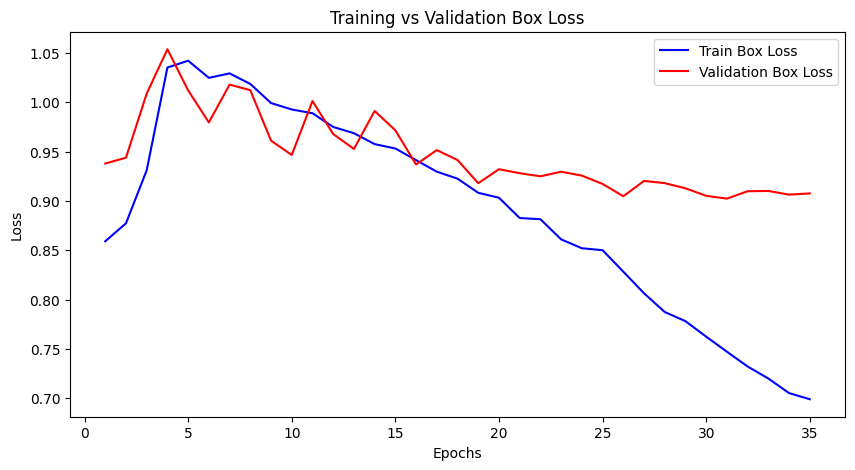

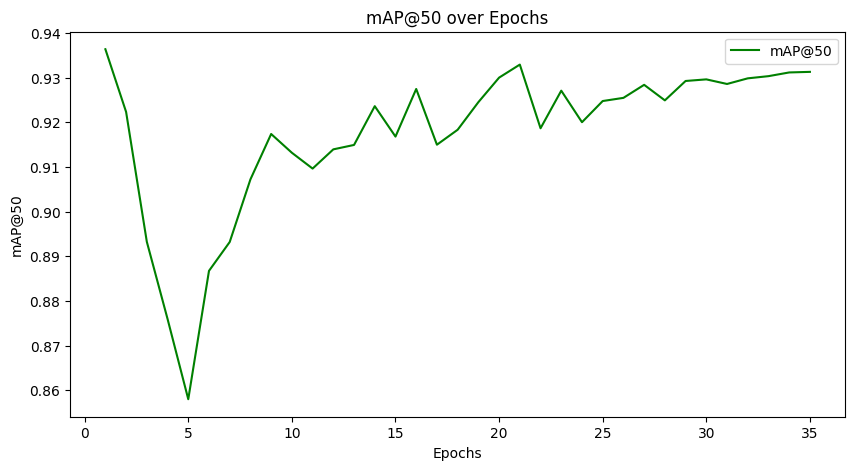

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('/content/results_train3.csv')

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Box Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50', color='green')
plt.xlabel('Epochs')
plt.ylabel('mAP@50')
plt.title('mAP@50 over Epochs')
plt.legend()
plt.show()

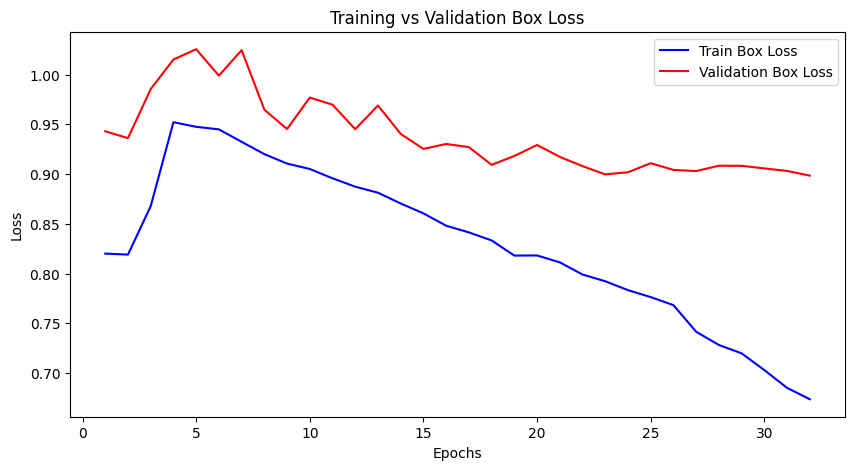

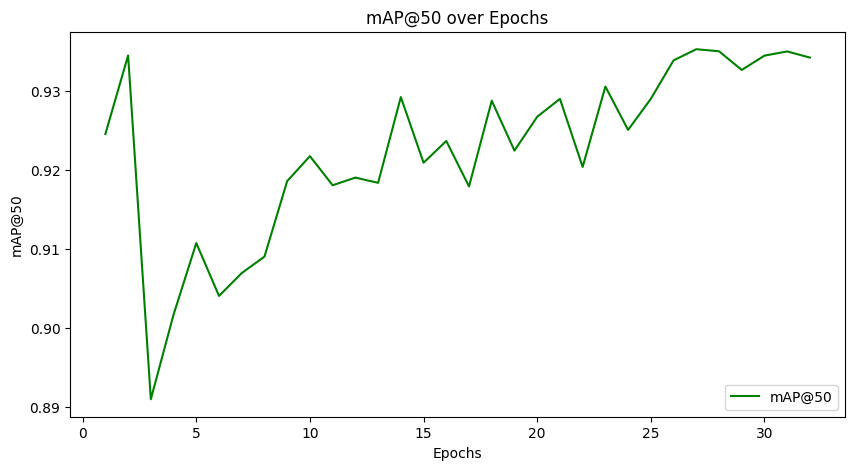

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('/content/results_train4.csv')

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Box Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50', color='green')
plt.xlabel('Epochs')
plt.ylabel('mAP@50')
plt.title('mAP@50 over Epochs')
plt.legend()
plt.show()

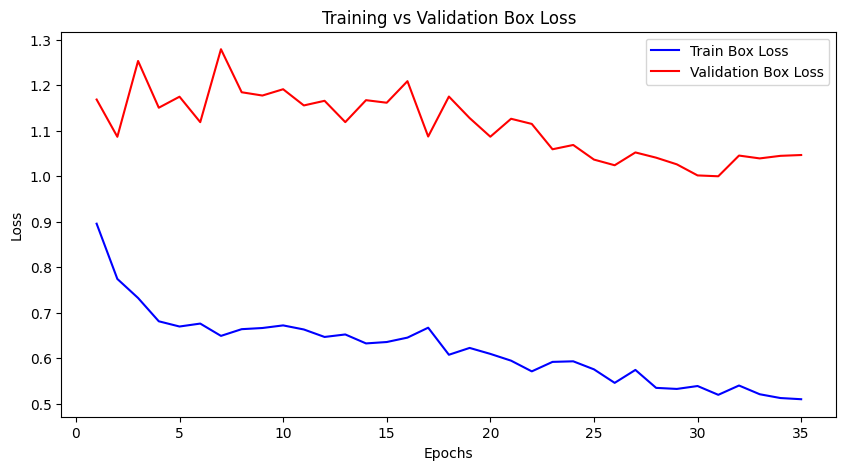

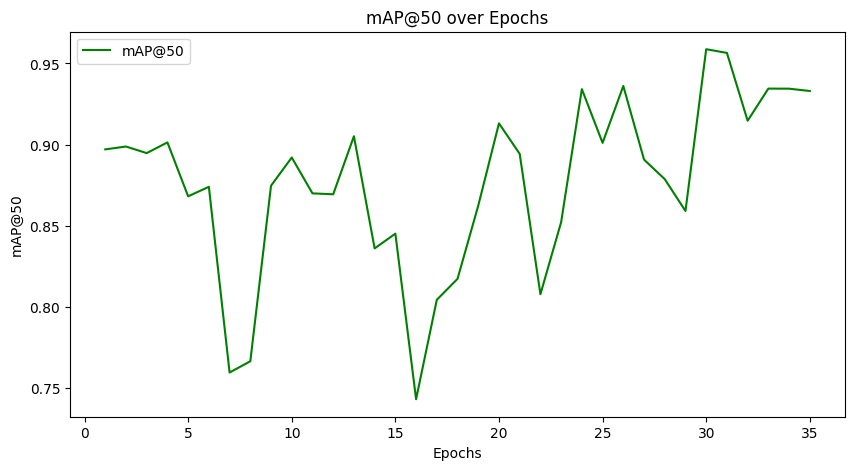

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('/content/results_fnt.csv')

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Box Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50', color='green')
plt.xlabel('Epochs')
plt.ylabel('mAP@50')
plt.title('mAP@50 over Epochs')
plt.legend()
plt.show()

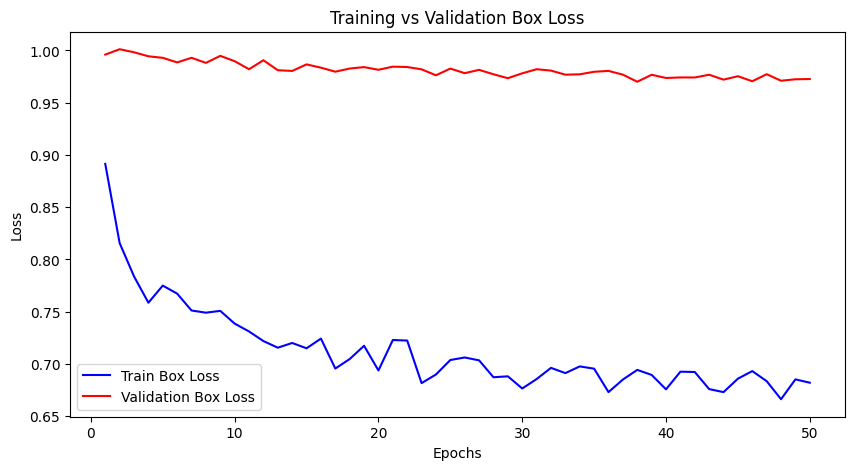

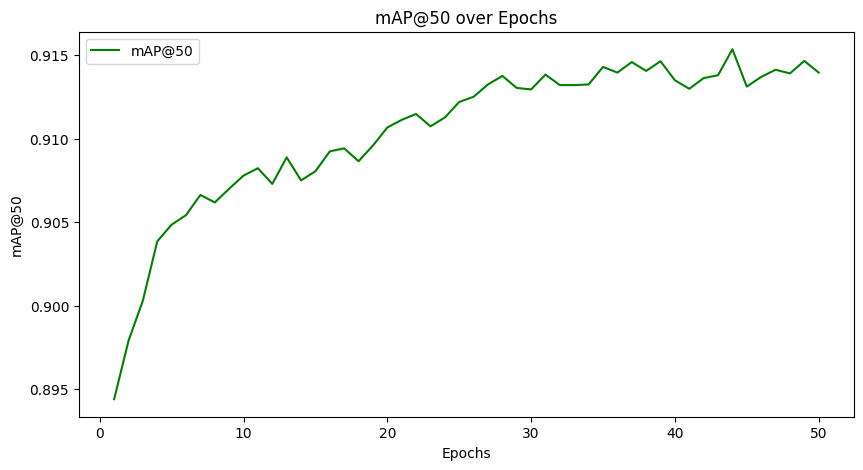

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('/content/results_train4.csv')

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Box Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50', color='green')
plt.xlabel('Epochs')
plt.ylabel('mAP@50')
plt.title('mAP@50 over Epochs')
plt.legend()
plt.show()

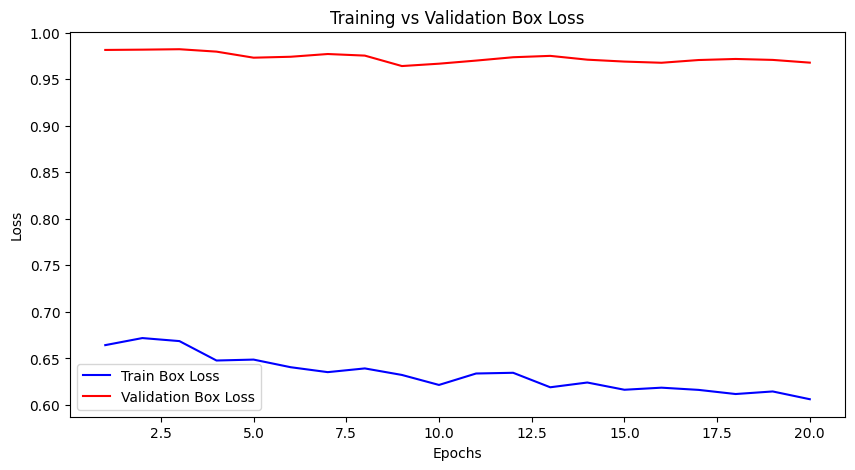

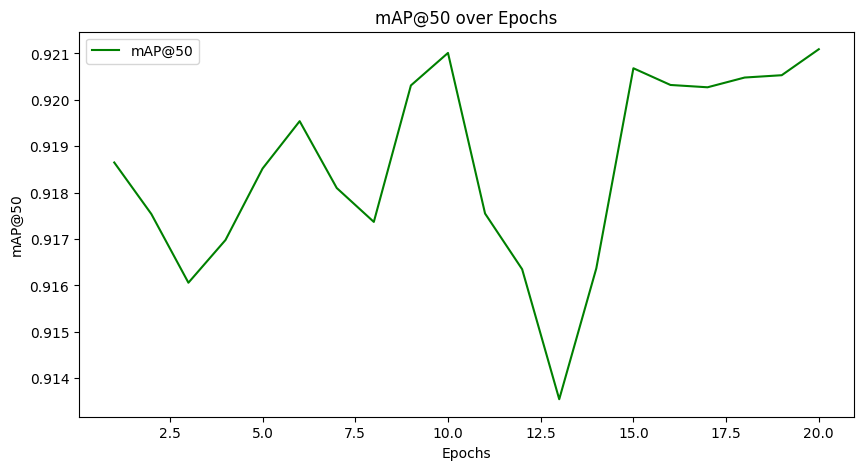

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('/content/results_42.csv')

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Box Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50', color='green')
plt.xlabel('Epochs')
plt.ylabel('mAP@50')
plt.title('mAP@50 over Epochs')
plt.legend()
plt.show()

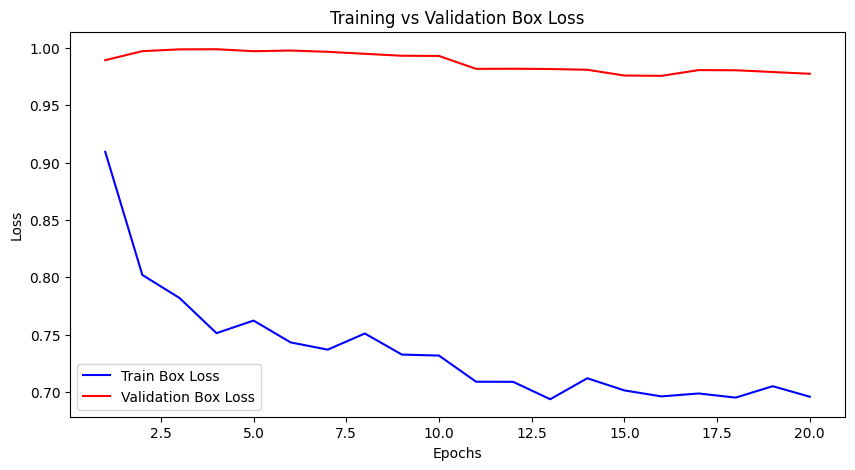

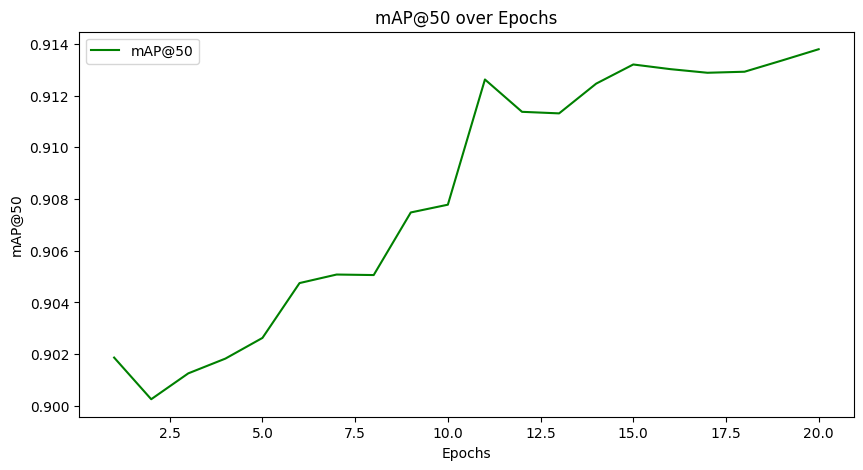

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('/content/drive/MyDrive/YOLO/train5/results.csv')

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Box Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50', color='green')
plt.xlabel('Epochs')
plt.ylabel('mAP@50')
plt.title('mAP@50 over Epochs')
plt.legend()
plt.show()

